# Extracting and Visualizing Stock Data

In [1]:
!pip install yfinance==0.2.4
!pip install nbformat==4.2.0
!pip install ipykernel
!pip install --upgrade nbformat
from bs4 import BeautifulSoup as bs
import yfinance as yf
import pandas as pd
import requests
import plotly.graph_objects as go
from plotly.subplots import make_subplots

  Using cached nbformat-4.2.0-py2.py3-none-any.whl (153 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
anaconda-client 1.11.3 requires nbformat>=4.4.0, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.5.13 requires nbformat>=5.0, but you have nbformat 4.2.0 which is incompatible.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 4.2.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.
jupyter-server 2.5.0 requires nbformat>=5.3.0, bu

### Defining Our Graphing Function

In order for our graph functions to work we need the right inputs.</br>
This would be stock price data and revenue data.
1. A DataFrame with date and close columns
        
2. A DataFrame with date and revenue columns

In [2]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Extracting Tesla Stock Data with yfinance

In [3]:
tesla = yf.Ticker('TSLA')

In [4]:
tesla_data = tesla.history(period='max')
# tesla_data.head()

Here, we can see the date is used as the index.</br>
Let's fix that.

In [5]:
tesla_data.reset_index(inplace=True)
tesla_data.head()
# Now the dataframe is properly indexed and Date is simply a column

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Extracting Tesla Revenue Data Using Webscraping

In [6]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

Now that we have our website data saved we can parse it using <code>Beautiful Soup</code>

In [7]:
soup = bs(html_data,'html5lib')

We can now continue to extract the specific data we need using html <code>tags</code> but instead we will use a handy pandas function for extracting tables. </br> Since it's the only table on the page, we simply select the first index.

In [8]:
tesla_pandas_read_data = pd.read_html(url)
tesla_revenue = tesla_pandas_read_data[0]
tesla_revenue.head()

,Tesla Annual Revenue (Millions of US $),Tesla Annual Revenue (Millions of US $).1
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


It seems like our label columns aren't very helpful so let's rename them.

In [9]:
tesla_revenue = tesla_revenue.rename(columns={'Tesla Annual Revenue (Millions of US $)':'Date','Tesla Annual Revenue (Millions of US $).1':'Revenue'})

For us to make this data more useful, we need to clean it up a little.</br>
This means removing characters such as '$' and ',' from revenue column.

In [10]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$','')

/var/folders/fy/3tqlkdqx5sj6b1s8svhpws4r0000gn/T/ipykernel_9519/4054263143.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$','')


In [11]:
tesla_revenue.head()

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


Now let's remove any null or empty strings

In [12]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']

In [13]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


### Extracting GameStop Stock Data with yfinance

In [14]:
game_stop = yf.Ticker('GME')

In [15]:
gme_data = game_stop.history(period='max')

In [16]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Extracting GameStop Revenue Data using Web Scraping

In [17]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data = requests.get(url).text

In [18]:
soup = bs(html_data,'html5lib')

In [19]:
gme_pandas_read_data = pd.read_html(url)
gme_revenue =gme_pandas_read_data[0]
gme_revenue.head()

,GameStop Annual Revenue (Millions of US $),GameStop Annual Revenue (Millions of US $).1
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"


In [20]:
gme_revenue = gme_revenue.rename(columns={'GameStop Annual Revenue (Millions of US $)':'Date','GameStop Annual Revenue (Millions of US $).1':'Revenue'})
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$','')
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']

/var/folders/fy/3tqlkdqx5sj6b1s8svhpws4r0000gn/T/ipykernel_9519/3543369950.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$','')


In [21]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## Plot Tesla Stock Graph

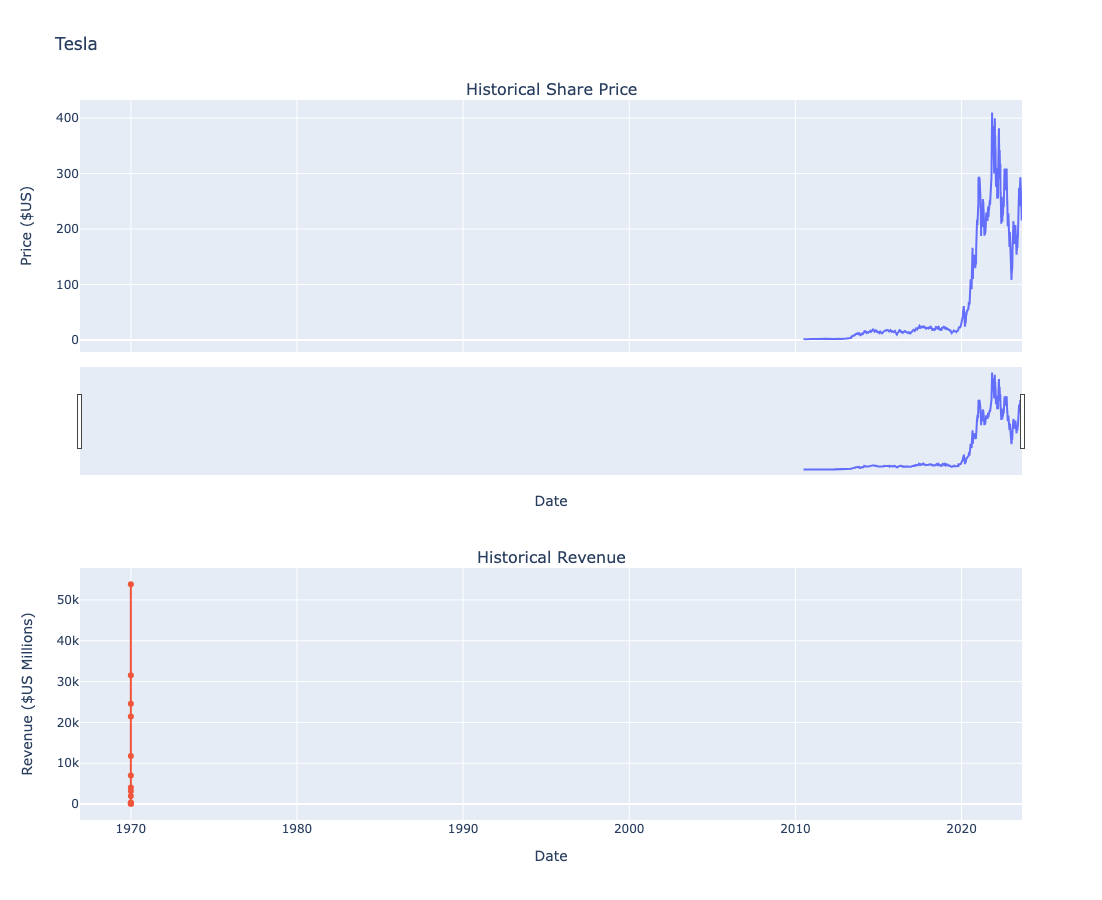

In [25]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Plot GME Stock Graph

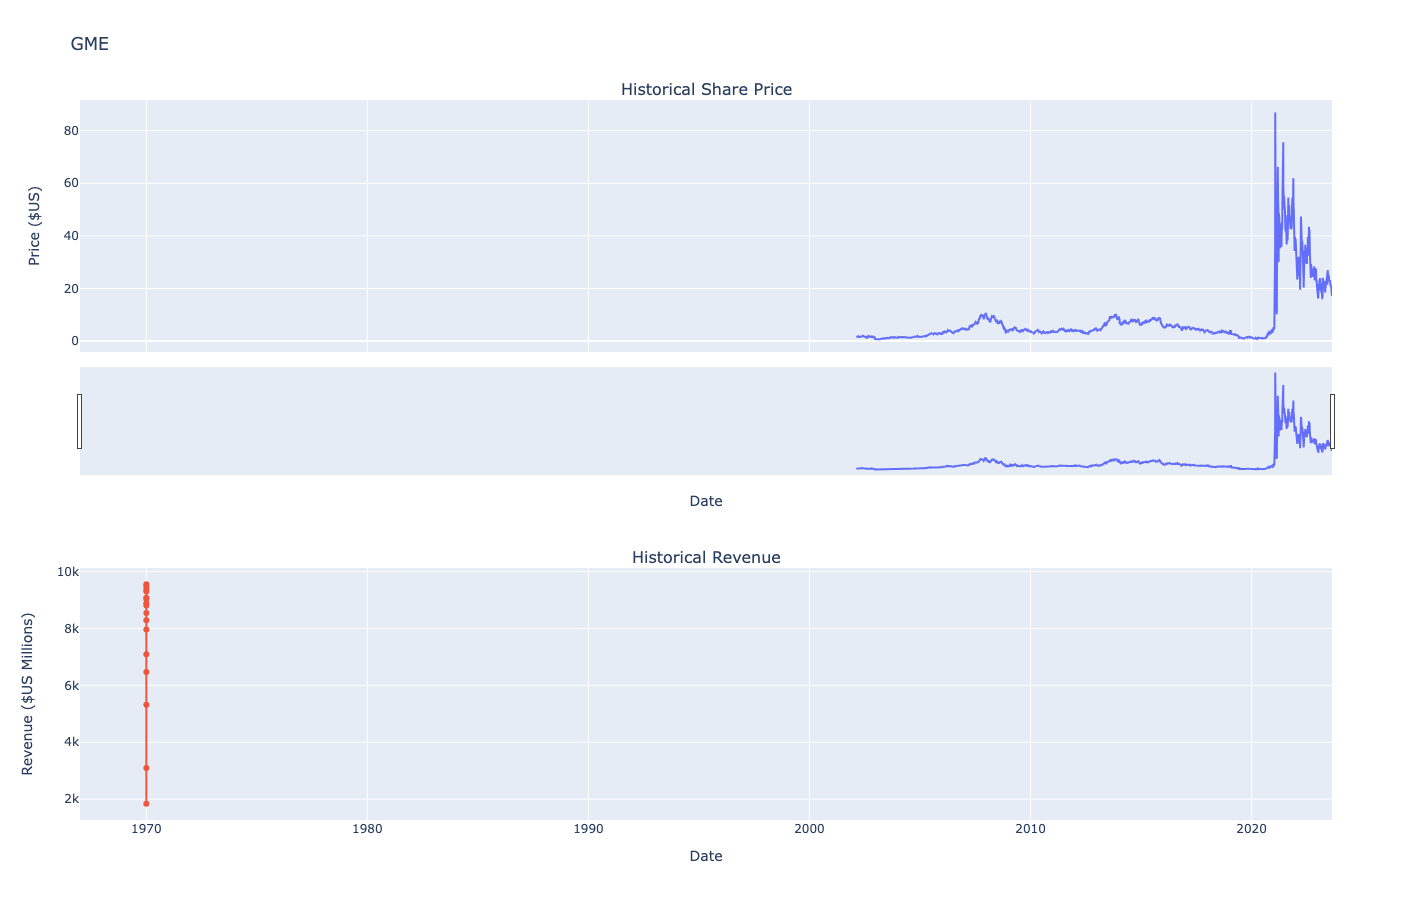

In [24]:
make_graph(gme_data, gme_revenue, 'GME')